# Probability Models of Preferences

To generate profiles, we use the [Preflib.org](https://preflib.org) tools available at [https://github.com/PrefLib/PrefLib-Tools](https://github.com/PrefLib/PrefLib-Tools).   


## Impartial (Anonymous) Culture

1. IC: Impartial Culture Model - generate a profile by sampling  from a uniform distribution over profiles with $n$ candidates and $m$ voters. 

2. IAC: Impartial Anonymous Culture Model - generate a profile by sampling  from a uniform distribution over *anonymous* profiles with $n$ candidates and $m$ voters. 

3. INAC: Impartial Anonymous and Neutral Culture Model<br/>
    O. Egecioglu and A. Giritligil (2013). [The Impartial, Anonymous, and Neutral Culture Model: A Probability Model for Sampling Public Preference Structures](https://sites.cs.ucsb.edu/~omer/DOWNLOADABLE/GMAS_public_preference13.pdf), Journal of Mathematical Sociology, 37: pp. 203 - 222

In [90]:
# import the Profile class
from voting.profiles import Profile
from voting.generate_profiles import *
from voting.voting_methods import *
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import pickle
import random

from tqdm.notebook import tqdm

## Urn Model

In the Polya-Eggenberger urn model, each voter in turn randomly draws a linear order from an urn. Initially the urn is $\mathcal{L}(X)$. If a voter randomly chooses $L$ from the urn, we return $L$ to the urn plus $\alpha\in\mathbb{N}$ copies of $L$. 

* IC is the special case where $\alpha=0$. 
* IAC is the special case where $\alpha=1$. 


In [91]:
print("Generated by the URN model with alpha = 0")
prof = generate_profile(4, 5, probmod="URN", probmod_param=0)
prof.display()

print("Generated by the URN model with alpha = 1")
prof = generate_profile(4, 5, probmod="URN", probmod_param=1)
prof.display()

print("Generate by URN model with alpha = 10")
prof = generate_profile(4, 5, probmod="URN", probmod_param=10)
prof.display()

print("Generate by URN model with alpha = 100")
prof = generate_profile(4, 5, probmod="URN", probmod_param=100)
prof.display()

Generated by the URN model with alpha = 0
+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+
| 0 | 1 | 2 | 3 | 1 |
| 1 | 3 | 3 | 1 | 0 |
| 3 | 0 | 0 | 2 | 3 |
| 2 | 2 | 1 | 0 | 2 |
+---+---+---+---+---+
Generated by the URN model with alpha = 1
+---+---+---+---+
| 1 | 2 | 1 | 1 |
+---+---+---+---+
| 0 | 3 | 2 | 1 |
| 1 | 2 | 1 | 0 |
| 3 | 0 | 0 | 2 |
| 2 | 1 | 3 | 3 |
+---+---+---+---+
Generate by URN model with alpha = 10
+---+---+
| 4 | 1 |
+---+---+
| 2 | 0 |
| 0 | 2 |
| 3 | 3 |
| 1 | 1 |
+---+---+
Generate by URN model with alpha = 100
+---+
| 5 |
+---+
| 2 |
| 3 |
| 0 |
| 1 |
+---+


In [92]:
## from preflib tools ###

# Generate votes based on the URN Model..
# we need numvotes with replace replacements.
def gen_urn(numvotes, replace, alts):
    voteMap = {}
    ReplaceVotes  = {}
    
    ICsize = math.factorial(len(alts))
    print("ICsize ", ICsize)
    ReplaceSize = 0

    for x in range(numvotes):
        print("initially  voteMap is", voteMap)
        print("initially ReplaceVotes is", ReplaceVotes)
        flip =  random.randint(1, ICsize+ReplaceSize)
        print("flip:", flip)
        if flip <= ICsize:
            #generate an IC vote and make a suitable number of replacements...
            print("flip less than ICsize, so generate a new ranking")
            tvote = tuple(np.random.permutation(len(alts))) # gen_ic_vote(alts)
            voteMap[tvote] = (voteMap.get(tvote, 0) + 1)
            ReplaceVotes[tvote] = (ReplaceVotes.get(tvote, 0) + replace)
            ReplaceSize += replace
            print("ReplaceSize", ReplaceSize)
            print("made " + str(tvote))
        else:
            print("find the ranking from ReplaceVote ")

            #iterate over replacement hash and select proper vote.
            flip = flip - ICsize
            for vote in ReplaceVotes.keys():
                print("testing ", vote)
                flip = flip - ReplaceVotes[vote]
                print("flip is now", flip)
                if flip <= 0:
                    print("Found the ranking")
                    voteMap[vote] = (voteMap.get(vote, 0) + 1)
                    ReplaceVotes[vote] = (ReplaceVotes.get(vote, 0) + replace)
                    ReplaceSize += replace
                    break
            else:
                print("We Have a problem... replace fell through....")		
                exit()
        print("now, voteMap is", voteMap)
        print("now, ReplaceVotes is", ReplaceVotes)
        print("======\n")
    return voteMap

# Return a TUPLE! IC vote given a vector of alternatives.   

def gen_ic_vote(alts):
    options = list(alts)
    vote  = []
    while(len(options) > 0):
        #randomly select an option
        vote.append(options.pop(random.randint(0,len(options)-1)))
    return tuple(vote)


In [93]:
gen_urn(7,1,[0,1,2])

ICsize  6
initially  voteMap is {}
initially ReplaceVotes is {}
flip: 1
flip less than ICsize, so generate a new ranking
ReplaceSize 1
made (0, 2, 1)
now, voteMap is {(0, 2, 1): 1}
now, ReplaceVotes is {(0, 2, 1): 1}

initially  voteMap is {(0, 2, 1): 1}
initially ReplaceVotes is {(0, 2, 1): 1}
flip: 7
find the ranking from ReplaceVote 
testing  (0, 2, 1)
flip is now 0
Found the ranking
now, voteMap is {(0, 2, 1): 2}
now, ReplaceVotes is {(0, 2, 1): 2}

initially  voteMap is {(0, 2, 1): 2}
initially ReplaceVotes is {(0, 2, 1): 2}
flip: 3
flip less than ICsize, so generate a new ranking
ReplaceSize 3
made (1, 0, 2)
now, voteMap is {(0, 2, 1): 2, (1, 0, 2): 1}
now, ReplaceVotes is {(0, 2, 1): 2, (1, 0, 2): 1}

initially  voteMap is {(0, 2, 1): 2, (1, 0, 2): 1}
initially ReplaceVotes is {(0, 2, 1): 2, (1, 0, 2): 1}
flip: 9
find the ranking from ReplaceVote 
testing  (0, 2, 1)
flip is now 1
testing  (1, 0, 2)
flip is now 0
Found the ranking
now, voteMap is {(0, 2, 1): 2, (1, 0, 2): 2}
now,

{(0, 2, 1): 3, (1, 0, 2): 2, (0, 1, 2): 1, (2, 1, 0): 1}

## Mallows Model

In the Mallow's model, given a reference ranking $L_0\in\mathcal{L}(X)$ and $\phi\in (0,1]$, the probability that a voter's ballot is $L\in\mathcal{L}(X)$ is $Pr_{L_0}(L)=\phi^{\tau(L,L_0)}/C$ where $\tau(L,L_0)= {{|X|}\choose{2}} - |L\cap L_0|$, the Kendell-tau distance of $L$ to $L_0$, and $C$ is a normalization constant.   


The **Kendal-tau** distance, also known as the **swap** distance,  between rankings $R_1$ and $R_2$ is the minimal number of swaps of adjacent candidates needed to turn ranking $R_1$ into ranking $R_2$.


E.g., the rankings $a\ b\ c\ d$  and $a\ d\ b\ c$ has a swap distance of 2. 

IC is the special case where $\phi=1$.  


MALLOWS_2REF: Consider an ordering $L_0$ and its converse $L_0^{-1}$ (e.g., $L_0$ ranks candidates from more liberal to more conservative, and $L_0^{-1}$ vice versa), in which case the probability that a voter's ballot is $L$ is $\frac{1}{2} Pr_{L_0}(L)+\frac{1}{2}Pr_{L_0^{-1}}(L)$. 

In [94]:
import random 

# For Phi and a given number of candidates, compute the
# insertion probability vectors.
def compute_mallows_insertvec_dist(ncand, phi):
    #Compute the Various Mallows Probability Distros
    vec_dist = {}
    for i in range(1, ncand+1):
        #Start with an empty distro of length i
        dist = [0] * i
        #compute the denom = phi^0 + phi^1 + ... phi^(i-1)
        denom = sum([pow(phi,k) for k in range(i)])
        #Fill each element of the distro with phi^i-j / denom
        for j in range(1, i+1):
            dist[j-1] = pow(phi, i - j) / denom
        #print(str(dist) + "total: " + str(sum(dist)))
        vec_dist[i] = dist
    return vec_dist

# Return a value drawn from a particular distribution.
def draw(values, distro):
    #Return a value randomly from a given discrete distribution.
    #This is a bit hacked together -- only need that the distribution
    #sums to 1.0 within 5 digits of rounding.
    if round(sum(distro),5) != 1.0:
        print("Input Distro is not a Distro...")
        print(str(distro) + "  Sum: " + str(sum(distro)))
        exit()
    if len(distro) != len(values):
        print("Values and Distro have different length")

    cv = 0
    draw = random.random() - distro[cv]
    while draw > 0.0:
        cv+= 1
        draw -= distro[cv]
    return values[cv]


In [95]:
values = [1, 2, 3, 4, 5]

distros = [0.25, 0.35, 0.1, 0.1, 0.2]

for _ in range(10):
    print("the draw is ", draw(values, distros))

the draw is  2
the draw is  3
the draw is  2
the draw is  1
the draw is  1
the draw is  2
the draw is  3
the draw is  2
the draw is  3
the draw is  5


In [96]:
phi = 0.0
ncands = 5
print(compute_mallows_insertvec_dist(ncands, phi))

{1: [1.0], 2: [0.0, 1.0], 3: [0.0, 0.0, 1.0], 4: [0.0, 0.0, 0.0, 1.0], 5: [0.0, 0.0, 0.0, 0.0, 1.0]}


In [97]:

# Generate a Mallows model with the various mixing parameters passed in
# nvoters is the number of votes we need
# candmap is a candidate map
# mix is an array such that sum(mix) == 1 and describes the distro over the models
# phis is an array len(phis) = len(mix) = len(refs) that is the phi for the particular model
# refs is an array of dicts that describe the reference ranking for the set.
def gen_mallows(nvoters, candmap, mix, phis, refs):

    if len(mix) != len(phis) or len(phis) != len(refs):
        print("Mix != Phis != Refs")
        exit()

    print("refs is", refs)
    #Precompute the distros for each Phi and Ref.
    #Turn each ref into an order for ease of use...
    m_insert_dists = []
    for i in range(len(mix)):
        m_insert_dists.append(compute_mallows_insertvec_dist(len(candmap), phis[i]))
    print("m_insert_dists", m_insert_dists)
    #Now, generate votes...
    votemap = {}
    for cvoter in range(nvoters):
        cmodel = draw(list(range(len(mix))), mix)
        print("cmodel is ", cmodel)
        #Generate a vote for the selected model
        insvec = [0] * len(candmap)
        for i in range(1, len(insvec)+1):
            #options are 1...max
            print("i is ", i)
            print("Options: " + str(list(range(1, i+1))))
            print("Drawing on model " + str(cmodel))
            print("Dist: " + str(m_insert_dists[cmodel][i]))
            print("range ", list(range(1, i+1)))
            insvec[i-1] = draw(list(range(1, i+1)), m_insert_dists[cmodel][i])
            print("choice is ", insvec[i-1]) 
            print("--\n")
        print("\ninsvec is ", insvec,"\n")
        vote = []
        for i in range(len(refs[cmodel])):
            print("i is ", i)
            print("refs is ", refs[cmodel])
            print("candidate to add ", refs[cmodel][i])
            print("insert in position ", insvec[i]-1)
            #print("building vote insvec[i] - 1", insvec[i]-1)
            vote.insert(insvec[i]-1, refs[cmodel][i])
            print("vote is ", vote)
            print("++++\n")
        print("mallows vote: " + str(vote))
        tvote = tuple(vote)
        
        votemap[tuple(vote)] = votemap.get(tuple(vote), 0) + 1
        print("-------\n")
    return votemap


In [98]:
num_cands = 4
num_voters = 2
phis = [1.0]
cmap = {cn:cn for cn in range(num_cands)}
print(cmap)


print(gen_mallows(num_voters, 
                  cmap, 
                  [1.0], 
                  phis, 
                  [{0:3, 1:1, 2:0, 3:2}]))

{0: 0, 1: 1, 2: 2, 3: 3}
refs is [{0: 3, 1: 1, 2: 0, 3: 2}]
m_insert_dists [{1: [1.0], 2: [0.5, 0.5], 3: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 4: [0.25, 0.25, 0.25, 0.25]}]
cmodel is  0
i is  1
Options: [1]
Drawing on model 0
Dist: [1.0]
range  [1]
choice is  1
--

i is  2
Options: [1, 2]
Drawing on model 0
Dist: [0.5, 0.5]
range  [1, 2]
choice is  2
--

i is  3
Options: [1, 2, 3]
Drawing on model 0
Dist: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
range  [1, 2, 3]
choice is  1
--

i is  4
Options: [1, 2, 3, 4]
Drawing on model 0
Dist: [0.25, 0.25, 0.25, 0.25]
range  [1, 2, 3, 4]
choice is  3
--


insvec is  [1, 2, 1, 3] 

i is  0
refs is  {0: 3, 1: 1, 2: 0, 3: 2}
candidate to add  3
insert in position  0
vote is  [3]
++++

i is  1
refs is  {0: 3, 1: 1, 2: 0, 3: 2}
candidate to add  1
insert in position  1
vote is  [3, 1]
++++

i is  2
refs is  {0: 3, 1: 1, 2: 0, 3: 2}
candidate to add  0
insert in position  0
vote is  [0, 3, 1]
++++

i is  3
re

In [99]:
print("Generated by the MALLOWS model with phi = 0")
prof = generate_profile(4, 5, probmod="MALLOWS", probmod_param=0)
prof.display()

print("Generated by the MALLOWS model with phi = 0.1")
prof = generate_profile(4, 5, probmod="MALLOWS", probmod_param=0.1)
prof.display()

print("Generated by the MALLOWS model with phi = 0.5")
prof = generate_profile(4, 5, probmod="MALLOWS", probmod_param=0.5)
prof.display()

print("Generated by the MALLOWS model with phi = 0.8")
prof = generate_profile(4, 5, probmod="MALLOWS", probmod_param=0.8)
prof.display()


print("Generated by the MALLOWS model with phi = 1")
prof = generate_profile(4, 5, probmod="MALLOWS", probmod_param=1.0)
prof.display()


Generated by the MALLOWS model with phi = 0
+---+
| 5 |
+---+
| 0 |
| 2 |
| 3 |
| 1 |
+---+
Generated by the MALLOWS model with phi = 0.1
+---+---+
| 4 | 1 |
+---+---+
| 1 | 1 |
| 2 | 3 |
| 3 | 2 |
| 0 | 0 |
+---+---+
Generated by the MALLOWS model with phi = 0.5
+---+---+---+---+
| 1 | 1 | 2 | 1 |
+---+---+---+---+
| 3 | 1 | 3 | 0 |
| 0 | 0 | 0 | 2 |
| 2 | 3 | 1 | 3 |
| 1 | 2 | 2 | 1 |
+---+---+---+---+
Generated by the MALLOWS model with phi = 0.8
+---+---+---+---+
| 1 | 2 | 1 | 1 |
+---+---+---+---+
| 2 | 1 | 0 | 3 |
| 1 | 2 | 3 | 0 |
| 3 | 3 | 2 | 2 |
| 0 | 0 | 1 | 1 |
+---+---+---+---+
Generated by the MALLOWS model with phi = 1
+---+---+---+
| 2 | 2 | 1 |
+---+---+---+
| 3 | 2 | 3 |
| 0 | 0 | 0 |
| 2 | 3 | 1 |
| 1 | 1 | 2 |
+---+---+---+


In [100]:
print("Generated by the MALLOWS model with phi = 0")
prof = generate_profile(4, 5, probmod="MALLOWS_2REF", probmod_param=0)
prof.display()



Generated by the MALLOWS model with phi = 0
+---+---+
| 4 | 1 |
+---+---+
| 0 | 2 |
| 3 | 1 |
| 1 | 3 |
| 2 | 0 |
+---+---+


## Single Peaked 



In [101]:
# Return a Tuple for a IC-Single Peaked... with alternatives in range 1....range.
def gen_icsp_single_vote(alts):
    a = 0
    b = len(alts)-1
    temp = []
    while a != b:
        print(f"a={a}, b={b}")
        if random.randint(0,1) == 1:
            temp.append(alts[a])
            a+= 1
        else:
            temp.append(alts[b])
            b -= 1
        print("temp is ", temp)
    temp.append(alts[a])
    print(temp)
    print("-----\n")
    return tuple(temp[::-1]) # reverse


def gen_single_peaked_impartial_culture_strict(nvotes, alts):
    voteset = {}
    for i in range(nvotes):
        tvote = gen_icsp_single_vote(alts)
        voteset[tvote] = voteset.get(tvote, 0) + 1
    return voteset




In [102]:
num_cands = 3
num_voters = 10

vs = gen_single_peaked_impartial_culture_strict(num_voters,  [1,2,0] ) #list(range(num_cands)))

prof = Profile([v[0] for v in vs.items()], num_cands, rcounts = [v[1] for v in vs.items()])
prof.display()

a=0, b=2
temp is  [0]
a=0, b=1
temp is  [0, 1]
[0, 1, 2]
-----

a=0, b=2
temp is  [1]
a=1, b=2
temp is  [1, 2]
[1, 2, 0]
-----

a=0, b=2
temp is  [1]
a=1, b=2
temp is  [1, 2]
[1, 2, 0]
-----

a=0, b=2
temp is  [1]
a=1, b=2
temp is  [1, 0]
[1, 0, 2]
-----

a=0, b=2
temp is  [0]
a=0, b=1
temp is  [0, 2]
[0, 2, 1]
-----

a=0, b=2
temp is  [1]
a=1, b=2
temp is  [1, 2]
[1, 2, 0]
-----

a=0, b=2
temp is  [1]
a=1, b=2
temp is  [1, 2]
[1, 2, 0]
-----

a=0, b=2
temp is  [0]
a=0, b=1
temp is  [0, 1]
[0, 1, 2]
-----

a=0, b=2
temp is  [0]
a=0, b=1
temp is  [0, 1]
[0, 1, 2]
-----

a=0, b=2
temp is  [0]
a=0, b=1
temp is  [0, 2]
[0, 2, 1]
-----

+---+---+---+---+
| 3 | 4 | 1 | 2 |
+---+---+---+---+
| 2 | 0 | 2 | 1 |
| 1 | 2 | 0 | 2 |
| 0 | 1 | 1 | 0 |
+---+---+---+---+


## Spatial Model 

S. Merrill, III (1993). [Voting behavior under the directional spatial model of electoral
competition](https://link.springer.com/article/10.1007/BF01047992), Public Choice 77, pp. 739 - 756.



In [103]:
def voter_utility(v_pos, c_pos, beta):
    '''Based on the Rabinowitz and Macdonald (1989) mixed model
    described in Section 3, pp. 745 - 747 of 
    "Voting behavior under the directional spatial model of electoral competition" by S. Merrill III 
    
    beta = 1 is the proximity model
    beta = 0 is the directional model
    '''
    return 2 * np.dot(v_pos, c_pos) - beta*(np.linalg.norm(v_pos)**2 + np.linalg.norm(c_pos)**2)

def create_prof_spatial_model2(num_voters, cmap, params):
    num_dim = params[0] # the first component of the parameter is the number of dimensions
    beta = params[1] # used to define the mixed model: beta = 1 is proximity model (i.e., Euclidean distance)
    num_cands = len(cmap.keys())  
    mean = [0] * num_dim # mean is 0 for each dimension
    cov = np.diag([1]*num_dim)  # diagonal covariance
    
    # sample candidate/voter positions using a multivariate normal distribution
    cand_positions = np.random.multivariate_normal(np.array(mean), cov, num_cands)
    voter_positions = np.random.multivariate_normal(np.array(mean), cov, num_voters)
    
    # generate the rankings and counts for each ranking
    ranking_counts = dict()
    for v,v_pos in enumerate(voter_positions):
        v_utils = {voter_utility(v_pos,c_pos,beta): c for c,c_pos in enumerate(cand_positions)}
        ranking = tuple([v_utils[_u] for _u in sorted(v_utils.keys(),reverse=True)])
        if ranking in ranking_counts.keys():
            ranking_counts[ranking] += 1
        else:
            ranking_counts.update({ranking:1})
    
    # list of tuples where first component is a ranking and the second is the count
    prof_counts = ranking_counts.items()
    
    return [rc[0] for rc in prof_counts], [rc[1] for rc in prof_counts], list(voter_positions), list(cand_positions)


[array([ 0.40988182, -3.61007918])]
+---+
| 1 |
+---+
| 1 |
| 2 |
| 3 |
| 0 |
+---+
the utility of 0 is -18.033015353265906
the utility of 1 is -6.376399610819096
the utility of 2 is -7.301522619373724
the utility of 3 is -16.194106474431926


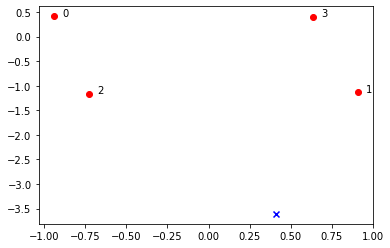

In [104]:
num_cands = 4

beta = 1.0
dim = 2

rankings,rcounts,voter_positions, cand_positions = create_prof_spatial_model2(1, 
                                                                              {c:c for c in range(num_cands)}, 
                                                                              [dim, beta])

print(voter_positions)
prof = Profile(rankings, num_cands, rcounts=rcounts)

prof.display()

plt.scatter([v[0] for v in voter_positions], [v[1] for v in voter_positions], color='blue', marker='x')

plt.scatter([c[0] for c in cand_positions], [c[1] for c in cand_positions], color='red', marker='o')

for c_idx,c in enumerate(cand_positions):
    print(f"the utility of {c_idx} is {voter_utility(voter_positions[0], c, beta)}")

for c_idx,c in enumerate(cand_positions):
    plt.text(c[0]+0.05, c[1], c_idx)
plt.show()

+---+---+---+---+---+---+
| 1 | 3 | 3 | 1 | 1 | 1 |
+---+---+---+---+---+---+
| 3 | 1 | 2 | 2 | 1 | 1 |
| 1 | 0 | 1 | 1 | 2 | 2 |
| 0 | 2 | 0 | 3 | 0 | 3 |
| 2 | 3 | 3 | 0 | 3 | 0 |
+---+---+---+---+---+---+
the utility of 0 is -1.3165697933365554
the utility of 1 is -1.108596088831876
the utility of 2 is -1.8613703669461643
the utility of 3 is -0.3734274469644634


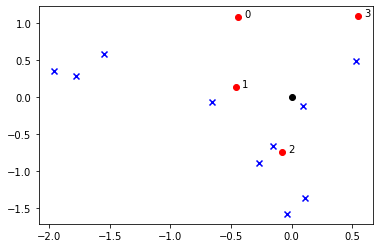

In [105]:
num_cands = 4
beta = 1.0
dim = 2


rankings,rcounts,voter_positions, cand_positions = create_prof_spatial_model2(10, 
                                                                              {c:c for c in range(num_cands)}, 
                                                                              [dim, beta])


prof = Profile(rankings, num_cands, rcounts=rcounts)

prof.display()


plt.scatter([v[0] for v in voter_positions], [v[1] for v in voter_positions], color='blue', marker='x')

plt.scatter([c[0] for c in cand_positions], [c[1] for c in cand_positions], color='red', marker='o')

plt.scatter([0], [0], color='black', marker='o')

for c_idx,c in enumerate(cand_positions):
    print(f"the utility of {c_idx} is {voter_utility(voter_positions[0], c, beta)}")

    
for c_idx,c in enumerate(cand_positions):
    plt.text(c[0]+0.05, c[1], c_idx)
plt.show()